In [1]:
import numpy as np
import scipy.linalg as spla
import scipy.sparse as sps
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [9., 6.]

# Building a parametric `LTIModel`

In [3]:
n = 100

E = sps.eye(n, format='lil')
E[0, 0] = E[-1, -1] = 0.5
E = E.tocsc()

alpha = 1.172e-5
N = (n - 1)**2
A0 = sps.diags([(n - 1) * [N], n * [-2 * N], (n - 1) * [N]], [-1, 0, 1], format='lil')
A0[0, 0] = -(n - 1) * n
A0[-1, -1] = -(n - 1) * n
A1 = sps.lil_matrix((n, n))
A1[:n//2, :] = alpha * A0[:n//2, :]
A1 = A1.tocsc()
A2 = sps.lil_matrix((n, n))
A2[n//2:, :] = A0[n//2:, :]
A2 = A2.tocsc()

B = np.zeros((n, 1))
B[0, 0] = alpha * (n - 1)

C = np.zeros((2, n))
C[0, -1] = 1
C[1, :] = 1/n

In [4]:
from pymor.models.iosys import LTIModel
from pymor.operators.numpy import NumpyMatrixOperator
from pymor.parameters.functionals import ProjectionParameterFunctional

In [5]:
Eop = NumpyMatrixOperator(E)

A1op = NumpyMatrixOperator(A1)
A2op = NumpyMatrixOperator(A2)
Aop = A1op + ProjectionParameterFunctional('p') * A2op

Bop = NumpyMatrixOperator(B)

Cop = NumpyMatrixOperator(C)

In [6]:
fom = LTIModel(Aop, Bop, Cop, E=Eop)

In [7]:
fom

LTIModel(
    LincombOperator(
        (NumpyMatrixOperator(<100x100 sparse, 149 nnz>), NumpyMatrixOperator(<100x100 sparse, 149 nnz>)),
        (1.0, ProjectionParameterFunctional('p', index=0))),
    NumpyMatrixOperator(<100x1 dense>),
    NumpyMatrixOperator(<2x100 dense>),
    D=ZeroOperator(NumpyVectorSpace(2), NumpyVectorSpace(1)),
    E=NumpyMatrixOperator(<100x100 sparse, 100 nnz>))

In [8]:
print(fom)

LTIModel
    class: LTIModel
    number of equations: 100
    number of inputs:    1
    number of outputs:   2
    continuous-time
    linear time-invariant
    solution_space:  NumpyVectorSpace(100)


In [9]:
fom.parameters

Parameters({p: 1})

## Poles

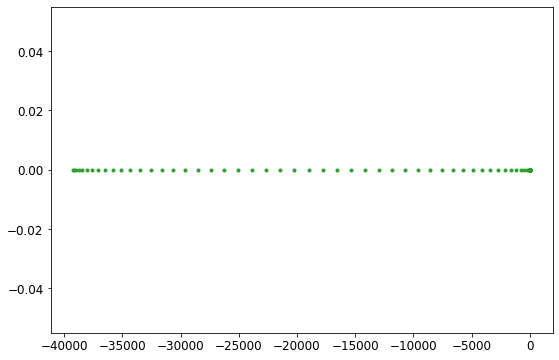

In [10]:
fig, ax = plt.subplots()
for p in [1e-6, 1e-3, 1]:
    poles = fom.poles(mu=p)
    ax.plot(poles.real, poles.imag, '.')

## Magnitude plot

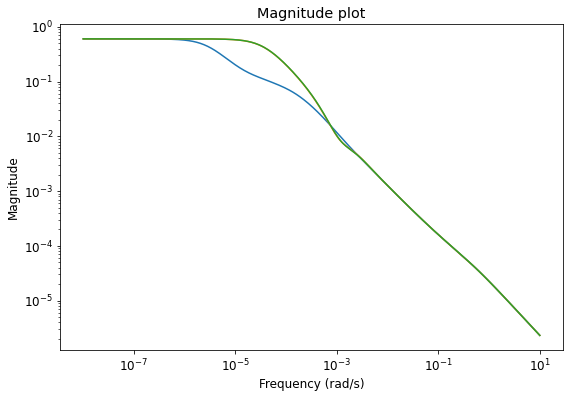

In [11]:
w = np.logspace(-8, 1, 500)
fig, ax = plt.subplots()
for p in [1e-6, 1e-3, 1]:
    fom.mag_plot(w, mu=p, ax=ax)

# Hankel singular values

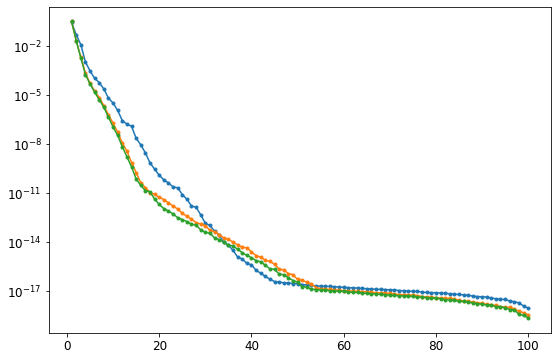

In [12]:
fig, ax = plt.subplots()
for p in [1e-6, 1e-3, 1]:
    hsv = fom.hsv(mu=p)
    ax.semilogy(range(1, n + 1), hsv, '.-')

## $\mathcal{H}_2$ norms

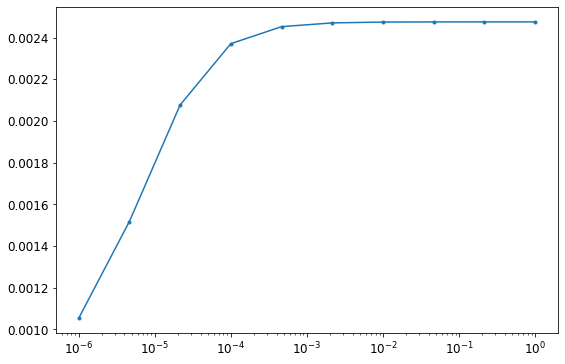

In [13]:
ps = np.logspace(-6, 0, 10)
h2_norms = [fom.h2_norm(mu=p) for p in ps]
_ = plt.semilogx(ps, h2_norms, '.-')

## $\mathcal{H}_\infty$ norms

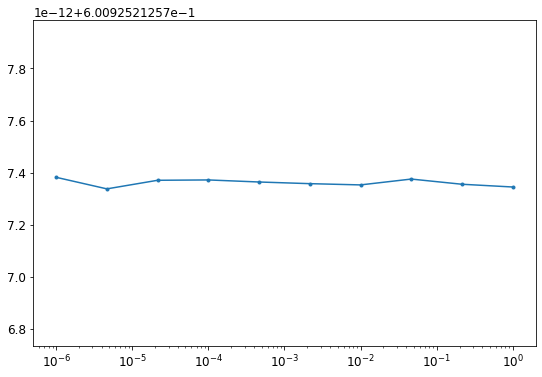

In [14]:
ps = np.logspace(-6, 0, 10)
hinf_norms = [fom.hinf_norm(mu=p) for p in ps]
_ = plt.semilogx(ps, hinf_norms, '.-')

# Balanced Truncation

In [15]:
from pymor.reductors.bt import BTReductor
from pymor.vectorarrays.constructions import cat_arrays

In [16]:
p_list = [1e-6, 1e-3, 1]
V = []
W = []
for p in p_list:
    bt = BTReductor(fom, mu=p)
    rom = bt.reduce(10)
    V.append(bt.V)
    W.append(bt.W)
V = cat_arrays(V)
W = cat_arrays(W)

00:05 gram_schmidt: Orthonormalizing vector 1 again
00:05 gram_schmidt: Orthonormalizing vector 2 again
00:05 gram_schmidt: Orthonormalizing vector 3 again
00:05 gram_schmidt: Orthonormalizing vector 4 again
00:05 gram_schmidt: Orthonormalizing vector 5 again
00:05 gram_schmidt: Orthonormalizing vector 6 again
00:05 gram_schmidt: Orthonormalizing vector 7 again
00:05 gram_schmidt: Orthonormalizing vector 8 again
00:05 gram_schmidt: Orthonormalizing vector 9 again
00:05 gram_schmidt: Orthonormalizing vector 1 again
00:05 gram_schmidt: Orthonormalizing vector 2 again
00:05 gram_schmidt: Orthonormalizing vector 3 again
00:05 gram_schmidt: Orthonormalizing vector 4 again
00:05 gram_schmidt: Orthonormalizing vector 5 again
00:05 gram_schmidt: Orthonormalizing vector 6 again
00:05 gram_schmidt: Orthonormalizing vector 7 again
00:05 gram_schmidt: Orthonormalizing vector 8 again
00:05 gram_schmidt: Orthonormalizing vector 9 again
00:05 LTIPGReductor: Operator projection ...
00:05 LTIPGReductor

In [17]:
from pymor.algorithms.svd_va import qr_svd

In [18]:
V2, s, Vh = qr_svd(cat_arrays([V, W]))

00:06 qr_svd: Computing QR decomposition ...
00:06 |   gram_schmidt: Orthonormalizing vector 10 again
00:06 |   gram_schmidt: Orthonormalizing vector 11 again
00:06 |   gram_schmidt: Orthonormalizing vector 12 again
00:06 |   gram_schmidt: Orthonormalizing vector 13 again
00:06 |   gram_schmidt: Orthonormalizing vector 14 again
00:06 |   gram_schmidt: Orthonormalizing vector 15 again
00:06 |   gram_schmidt: Orthonormalizing vector 16 again
00:06 |   gram_schmidt: Orthonormalizing vector 17 again
00:06 |   gram_schmidt: Orthonormalizing vector 18 again
00:06 |   gram_schmidt: Orthonormalizing vector 19 again
00:06 |   gram_schmidt: Orthonormalizing vector 20 again
00:06 |   gram_schmidt: Orthonormalizing vector 21 again
00:06 |   gram_schmidt: Orthonormalizing vector 22 again
00:06 |   gram_schmidt: Orthonormalizing vector 23 again
00:06 |   gram_schmidt: Orthonormalizing vector 24 again
00:06 |   gram_schmidt: Orthonormalizing vector 25 again
00:06 |   gram_schmidt: Orthonormalizing ve

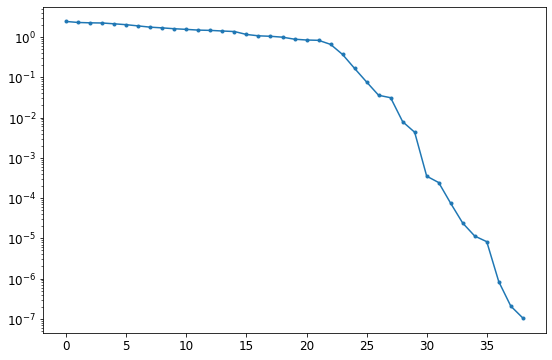

In [19]:
_ = plt.semilogy(s, '.-')

In [20]:
from pymor.reductors.basic import LTIPGReductor

In [21]:
r2 = 35
pg = LTIPGReductor(fom, V2[:r2], V2[:r2])
rom = pg.reduce()

00:06 LTIPGReductor: Operator projection ...
00:06 LTIPGReductor: Building ROM ...


In [22]:
err = fom - rom

## Poles

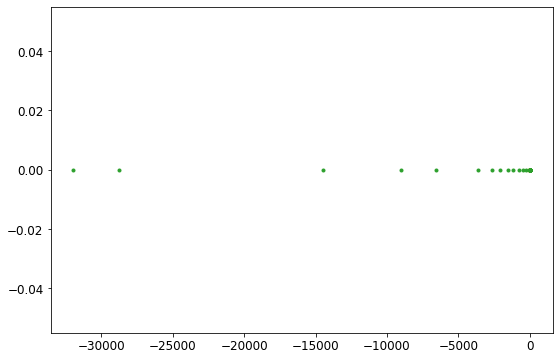

In [23]:
fig, ax = plt.subplots()
for p in [1e-6, 1e-3, 1]:
    poles = rom.poles(mu=p)
    ax.plot(poles.real, poles.imag, '.')

## Relative $\mathcal{H}_2$ errors

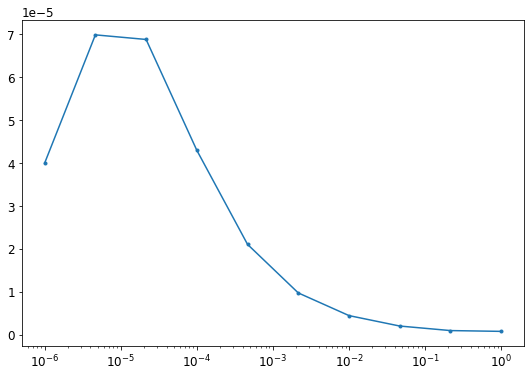

In [24]:
ps = np.logspace(-6, 0, 10)
rel_h2_errors = [err.h2_norm(mu=p) / fom.h2_norm(mu=p) for p in ps]
_ = plt.semilogx(ps, rel_h2_errors, '.-')

## Relative $\mathcal{H}_\infty$ errors

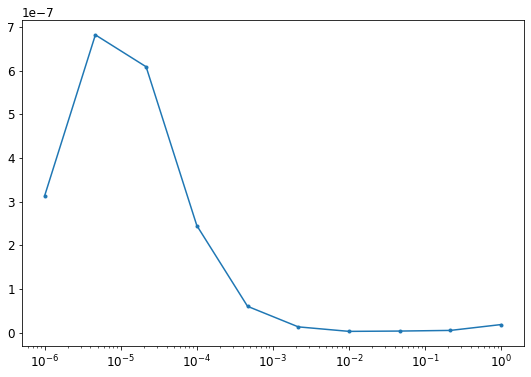

In [29]:
ps = np.logspace(-6, 0, 10)
rel_hinf_errors = [err.hinf_norm(mu=p) / fom.hinf_norm(mu=p) for p in ps]
_ = plt.semilogx(ps, rel_hinf_errors, '.-')